In [0]:
#Enhancements to the 4th improvement
# 1. Image Normalization
# 2. L2 regularization
# 3. ReLU after BN


# https://keras.io/

#Statement start with "!" is a command in Colab.
#The following command will quitly install keras python module from python packaging index
#After installing keras, it is being imported

!pip install -q keras
import keras

In [69]:
!mkdir /content/model

mkdir: cannot create directory ‘/content/model’: File exists


In [0]:
#numpy is imported with "np" as kind of alias. 
#From here on we can use np instead of numpy.

import numpy as np

#The following would import relevant models and layer. 
#Also, we have imported the mnist data set.

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import *
from keras.models import load_model
#from keras.regularizers import l2
from keras import regularizers

from keras.datasets import mnist

In [0]:
# Load MNIST data set into training data and test set data
# There are 70,000 images with their labels in MNIST dataset.
# Randomly, 60k will be loaded into X_train and their corresponding labels y_train.
# Remaining 10k images will be loaded into X_test and their labels y_test.

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_test_orig = X_test

(60000, 28, 28)


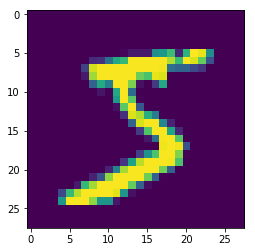

In [73]:
#Printing the shape of Training data set
#From this print statement, there are 60,000 images in X train of size 28X28.
#Correspoindingly, y_train is a column matrics of size 60000

print (X_train.shape)


# Using plt.imshow method from matplot library, the first image is printed. y[0] will be have a value of 5.
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#Convert the images in training dataset and test set into multidimentional arrays of their pixel intensity values.

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#Convert the pixel intensity values into floating point value and normalize the pixel intensities by dividing with 255. Max value of pixel intensity is 255.

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [76]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices

y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices

# This will convert the numbers in the Y_train and y_test into column metrics of size 10. Element corresponding to the number will have value 1 and all other elements will be 0.
# For example, 5 will be represented by the column matrics [0,0,0,0,1,0,0,0,0,0]


Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [78]:
#Print first 10 elements in the Y_train after converting into catogorical matrices.

Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [116]:
# create generator to standardize images
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# calculate mean on training dataset
datagen.fit(X_train)

# prepare an iterators to scale images
train_iterator = datagen.flow(X_train, Y_train, batch_size=128, shuffle=False)
validation_iterator = datagen.flow(X_test, Y_test, batch_size=128, shuffle=False)


# Applying L2 Regularization and ReLU after the batch normalizaion
model = Sequential()
 
model.add(Convolution2D(8, 3, 3, kernel_regularizer=regularizers.l2(0.01),input_shape=(28,28,1)))#26,3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.01)))#24,5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Convolution2D(32, 3, 3, kernel_regularizer=regularizers.l2(0.01)))#22,7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(8, 1, kernel_regularizer=regularizers.l2(0.01)))#22,7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2, 2))#11,14

model.add(Convolution2D(8, 3, 3, kernel_regularizer=regularizers.l2(0.01)))#9,16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Convolution2D(32, 3, 3, kernel_regularizer=regularizers.l2(0.01)))#7,18
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, activation='relu'))#7,18 
model.add(Dropout(0.1))
model.add(Convolution2D(10, 7))#1,24

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(28, 28, 1...)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg...)`


In [117]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_89 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_67 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
activation_42 (Activation)   (None, 26, 26, 8)         0         
_________________________________________________________________
dropout_78 (Dropout)         (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_68 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
activation_43 (Activation)   (None, 24, 24, 16)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [119]:
# Network will be trained for 40 epoches and after the training, model will have the weights.


checkpointer = ModelCheckpoint(filepath='/content/model/image-normalization-model.hdf5', 
                               monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)

model.fit_generator(train_iterator,steps_per_epoch=195, callbacks=[checkpointer],validation_data=validation_iterator,validation_steps=10, epochs=40,shuffle=True,initial_epoch=0)


Epoch 1/40
195/195 [==============================] - 18s 91ms/step - loss: 1.1615 - acc: 0.7844 - val_loss: 1.4845 - val_acc: 0.6289

Epoch 00001: val_acc improved from -inf to 0.62891, saving model to /content/model/image-normalization-model.hdf5
Epoch 2/40
195/195 [==============================] - 4s 18ms/step - loss: 0.4285 - acc: 0.9516 - val_loss: 1.2653 - val_acc: 0.6836

Epoch 00002: val_acc improved from 0.62891 to 0.68359, saving model to /content/model/image-normalization-model.hdf5
Epoch 3/40
195/195 [==============================] - 3s 18ms/step - loss: 0.2645 - acc: 0.9682 - val_loss: 0.5210 - val_acc: 0.8750

Epoch 00003: val_acc improved from 0.68359 to 0.87500, saving model to /content/model/image-normalization-model.hdf5
Epoch 4/40
195/195 [==============================] - 3s 18ms/step - loss: 0.1926 - acc: 0.9723 - val_loss: 0.2484 - val_acc: 0.9539

Epoch 00004: val_acc improved from 0.87500 to 0.95391, saving model to /content/model/image-normalization-model.hdf

In [0]:
# Predicting the numbers for the test data using the trained model

model = load_model('/content/model/image-normalization-model.hdf5')

#predicted_classes = model.predict_classes(X_test)

pred = model.predict(X_test)
predicted_classes =np.argmax(pred,axis=1)

bwindices = (predicted_classes != y_test)
windices = 1*(bwindices)

wrong_indices = np.nonzero(windices)[0]


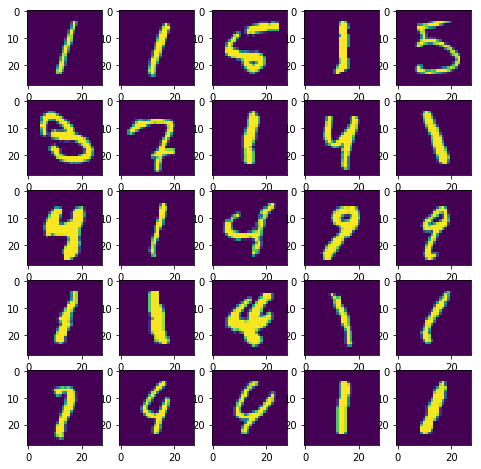

In [121]:
#Displaying first 25 wrongly classified images

first25 = wrong_indices[:25]

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    no = first25[i-1]
    img = X_test_orig[no]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()